## –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –±–∏–±–ª–∏–æ—Ç–µ–∫
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
import os
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    Trainer,
    TrainingArguments
)
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt



## –°—á–∏—Ç—ã–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–æ–≤ —Å –Ω–æ–≤–æ—Å—Ç—è–º–∏

In [ ]:
true_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pythonProject/itog/true_all.csv')
false_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pythonProject/itog/fake_all.csv')
df = pd.concat([true_df, false_df], ignore_index=True)

df.head()

df.sample(n=5)

text   label
9825  –ì—é–ª—å—á–µ—Ö—Ä–∞ –ë–æ–±–æ–∫—É–ª–æ–≤–∞ —Å—Ç–∞–Ω–µ—Ç –Ω–æ–≤–æ–π –Ω–∞—Å—Ç–∞–≤–Ω–∏—Ü–µ–π ...    –õ–æ–∂—å
9659  –ß–∏–Ω–æ–≤–Ω–∏–∫ 15 –ª–µ—Ç –Ω–µ —è–≤–ª—è–ª—Å—è –≤ —Å—É–¥ –ø–æ –¥–µ–ª—É –æ –∫–æ—Ä...    –õ–æ–∂—å
1115  –ü–µ–≤–∏—Ü–∞ –õ–æ–ª–∏—Ç–∞ –ú–∏–ª—è–≤—Å–∫–∞—è –≤—ã—Å–º–µ—è–ª–∞ –≤–∏–¥–µ–æ —Ç–µ–ª–µ–≤–µ–¥...  –ü—Ä–∞–≤–¥–∞
3447  –û–¥–∏–Ω–æ–∫–∏—Ö –ª—é–¥–µ–π –º–æ–∂–Ω–æ –≤—ã—è–≤–∏—Ç—å –ø–æ –ø–æ—Å—Ç–∞–º –≤ —Å–æ—Ü—Å–µ...  –ü—Ä–∞–≤–¥–∞
3664  –°–µ–≤–µ—Ä–Ω–∞—è –ú–∞–∫–µ–¥–æ–Ω–∏—è –ø–æ–ª—É—á–∏–ª–∞ –æ—Ç –ò—Ç–∞–ª–∏–∏ –Ω–∞ –±–µ–∑–º–æ...  –ü—Ä–∞–≤–¥–∞

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö


### 1) –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–µ–∫—Å—Ç–æ–≤ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É

In [ ]:
df["text"] = df["text"].str.lower().str.strip().str.rstrip('.').str.replace('¬´', '"').str.replace('¬ª', '"').str.rstrip(',')
df.shape

(10200, 2)

### 2) –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–æ–≤

In [ ]:
df = df.drop_duplicates(subset=['text'])
df.head()

text   label
0  —É—á–µ–Ω—ã–µ —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç–∞ —Ç–∞—Ñ—Ç—Å–∞ –∏ –≥–∞—Ä–≤–∞—Ä–¥—Å–∫–æ–≥–æ —É–Ω–∏–≤...  –ü—Ä–∞–≤–¥–∞
1  –æ–ª–∏–º–ø–∏–π—Å–∫–æ–≥–æ —á–µ–º–ø–∏–æ–Ω–∞ –ø–æ —Ñ–∏–≥—É—Ä–Ω–æ–º—É –∫–∞—Ç–∞–Ω–∏—é –¥–º–∏...  –ü—Ä–∞–≤–¥–∞
2  –≥–ª–∞–≤–Ω–æ–π –æ—à–∏–±–∫–æ–π –ø—Ä–∏ –ª–µ—á–µ–Ω–∏–∏ –∫–æ—Ä–æ–Ω–∞–≤–∏—Ä—É—Å–∞ —è–≤–ª—è–µ...  –ü—Ä–∞–≤–¥–∞
3  —Ä–æ—Å—Å–∏–π—Å–∫–∞—è —Ç—É—Ä–∏—Å—Ç–∫–∞ –æ—Ç–¥–æ—Ö–Ω—É–ª–∞ –≤ —à–∞—Ä–º-—ç—à-—à–µ–π—Ö–µ ...  –ü—Ä–∞–≤–¥–∞
4  –ø—Ä–µ–∑–∏–¥–µ–Ω—Ç –≤–ª–∞–¥–∏–º–∏—Ä –ø—É—Ç–∏–Ω –Ω–∞–∑–≤–∞–ª –ø—Ä–∏—á–∏–Ω—É, –ø–æ –∫–æ...  –ü—Ä–∞–≤–¥–∞

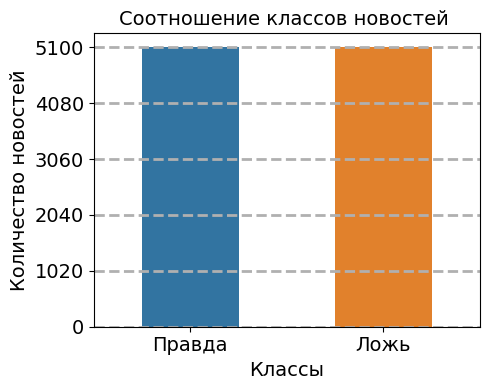

In [ ]:
values = df["label"].value_counts()
values_df = values.reset_index()
values_df.columns = ['–ú–µ—Ç–∫–∏', '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ']


plt.figure(figsize=(5, 4))

palette = sns.color_palette(n_colors=len(values_df))

ax = sns.barplot(
    x='–ú–µ—Ç–∫–∏',
    y='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ',
    data=values_df,
    palette=palette,
    hue='–ú–µ—Ç–∫–∏',
    legend=False,
    width=0.5
)

ax.yaxis.grid(True, linestyle='--', linewidth=2)

max_count = values_df['–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ'].max()
num_ticks = 6
tick_step = max(1, int(np.ceil(max_count / (num_ticks - 1))))
y_ticks = np.arange(0, max_count + tick_step, tick_step)
ax.set_yticks(y_ticks)

ax.set_title('–°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –Ω–æ–≤–æ—Å—Ç–µ–π ', fontsize=14)
ax.set_xlabel('–ö–ª–∞—Å—Å—ã', fontsize=14)
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–æ–≤–æ—Å—Ç–µ–π', fontsize=14)
ax.tick_params(axis='both', labelsize=14)

plt.tight_layout()
plt.show()

### 3) –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤

In [ ]:
# –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø —Å–ª–æ–≤
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def preprocess(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    tokens = [w for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].astype(str).apply(preprocess)



df["label"] = df["label"].apply(lambda x: 0 if x == "–õ–æ–∂—å" else 1)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é

In [ ]:
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:

# 4. –¢–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—è –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞
tokenizer = BertTokenizerFast.from_pretrained('DeepPavlov/rubert-base-cased')
MAX_LEN = 128

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = NewsDataset(
    train_df['clean_text'].tolist(),
    train_df['label'].tolist(),
    tokenizer,
    MAX_LEN
)
eval_dataset = NewsDataset(
    eval_df['clean_text'].tolist(),
    eval_df['label'].tolist(),
    tokenizer,
    MAX_LEN
)

# 5. –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–∏ –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è
model = BertForSequenceClassification.from_pretrained(
    'DeepPavlov/rubert-base-cased',
    num_labels=2
)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    eval_strategy='epoch',
    save_strategy='epoch',
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1',
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    prec, rec, f1, _ = precision_recall_fscore_support(
        labels, preds, average='binary'
    )
    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –æ–±—É—á–∞—é—â–µ–≥–æ –∫–ª–∞—Å—Å–∞ –º–æ–¥–µ–ª–∏
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


# 6. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
trainer.train()







# 7. –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏
best_model_path = os.path.join(training_args.output_dir, 'best_model')
model.save_pretrained(best_model_path)
tokenizer.save_pretrained(best_model_path)





Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: turilkin-valera (turilkin-valera-bmstu) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


('./results/best_model/tokenizer_config.json',
 './results/best_model/special_tokens_map.json',
 './results/best_model/vocab.txt',
 './results/best_model/added_tokens.json',
 './results/best_model/tokenizer.json')

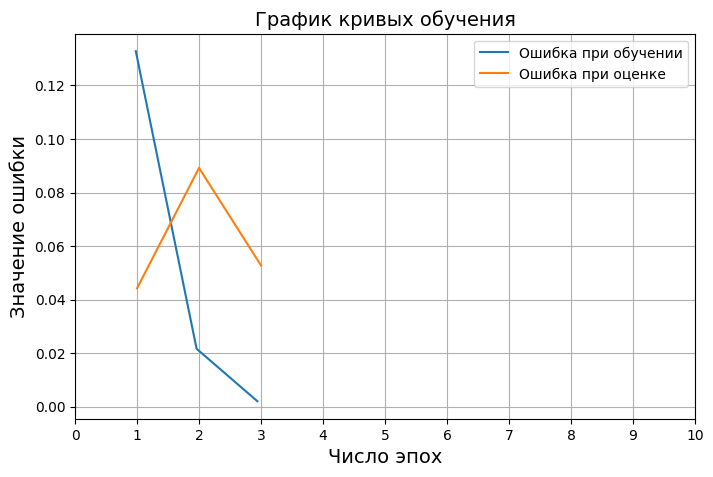

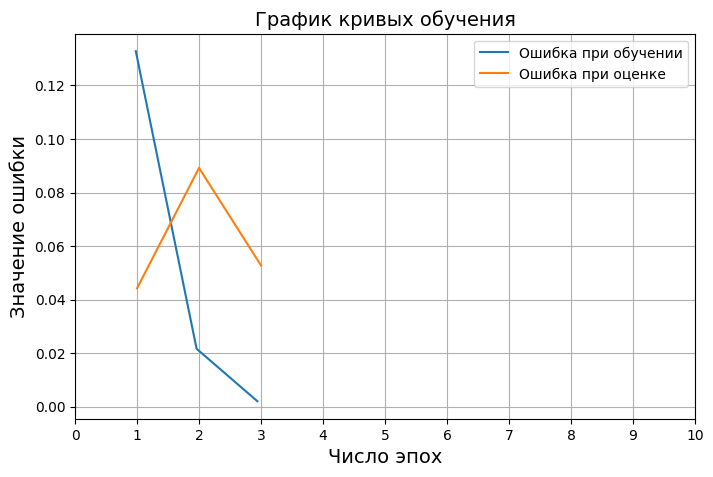

In [ ]:
log_history = trainer.state.log_history
df_log = pd.DataFrame(log_history)

plt.figure(figsize=(8, 5))
plt.plot(df_log[df_log['loss'].notna()]['epoch'], df_log[df_log['loss'].notna()]['loss'], label='–û—à–∏–±–∫–∞ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏')
if 'eval_loss' in df_log.columns:
    plt.plot(df_log[df_log['eval_loss'].notna()]['epoch'], df_log[df_log['eval_loss'].notna()]['eval_loss'], label='–û—à–∏–±–∫–∞ –ø—Ä–∏ –æ—Ü–µ–Ω–∫–µ')
plt.xlabel('–ß–∏—Å–ª–æ —ç–ø–æ—Ö', fontsize=14)
plt.ylabel('–ó–Ω–∞—á–µ–Ω–∏–µ –æ—à–∏–±–∫–∏', fontsize=14)
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∫—Ä–∏–≤—ã—Ö –æ–±—É—á–µ–Ω–∏—è', fontsize=14)
plt.xticks(np.arange(0, 11 ,1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions = trainer.predict(eval_dataset)
metrics = compute_metrics(predictions)


üìä –ú–µ—Ç—Ä–∏–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
Accuracy: 0.9931
Precision: 0.9942
Recall: 0.9923
F1: 0.9932

üìÑ –ü–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç—á—ë—Ç:
              precision    recall  f1-score   support

        –õ–æ–∂—å       0.99      0.99      0.99      1003
      –ü—Ä–∞–≤–¥–∞       0.99      0.99      0.99      1037

    accuracy                           0.99      2040
   macro avg       0.99      0.99      0.99      2040
weighted avg       0.99      0.99      0.99      2040



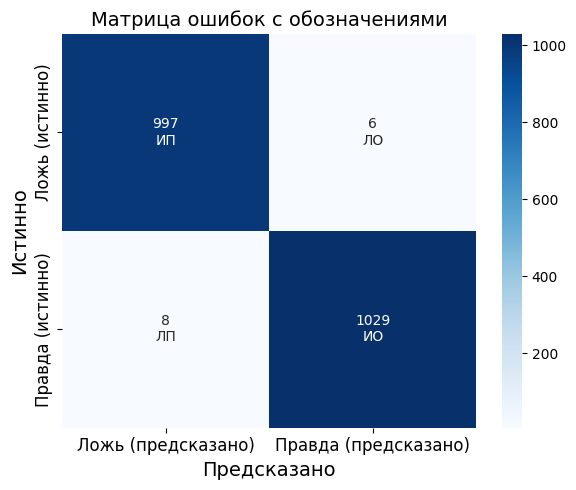

In [ ]:
print("\nüìä –ú–µ—Ç—Ä–∏–∫–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
for metric_name, value in metrics.items():
    print(f"{metric_name.capitalize()}: {value:.4f}")

print("\nüìÑ –ü–æ–¥—Ä–æ–±–Ω—ã–π –æ—Ç—á—ë—Ç:")
print(classification_report(
    predictions.label_ids,
    np.argmax(predictions.predictions, axis=1),
    target_names=["–õ–æ–∂—å", "–ü—Ä–∞–≤–¥–∞"]
))

cm = confusion_matrix(predictions.label_ids, np.argmax(predictions.predictions, axis=1))
labels = np.array([["–ò–ü", "–õ–û"],
                   ["–õ–ü", "–ò–û"]])
annot = np.empty_like(cm).astype(str)

for i in range(2):
    for j in range(2):
        annot[i, j] = f"{cm[i, j]}\n{labels[i, j]}"

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues',
            xticklabels=["–õ–æ–∂—å (–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ)", "–ü—Ä–∞–≤–¥–∞ (–ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ)"],
            yticklabels=["–õ–æ–∂—å (–∏—Å—Ç–∏–Ω–Ω–æ)", "–ü—Ä–∞–≤–¥–∞ (–∏—Å—Ç–∏–Ω–Ω–æ)"])

plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–æ', fontsize=14)
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω–æ', fontsize=14)
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ —Å –æ–±–æ–∑–Ω–∞—á–µ–Ω–∏—è–º–∏', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# 8. –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –æ–¥–Ω–æ–π –Ω–æ–≤–æ—Å—Ç–∏
def classify_news(text: str) -> str:
    clean = preprocess(text)
    inputs = tokenizer(
        clean,
        return_tensors='pt',
        padding='max_length',
        truncation=True,
        max_length=MAX_LEN
    )
    inputs = {k: v.to(model.device) for k, v in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    pred_id = torch.argmax(outputs.logits, dim=1).item()
    return '–õ–æ–∂–Ω–∞—è' if pred_id == 0 else '–ü—Ä–∞–≤–¥–∏–≤–∞—è'

In [ ]:
sample = '–†–ò–ê –ù–æ–≤–æ—Å—Ç–∏. –ö–æ—Ç—ã –∞—Ç–∞–∫–æ–≤–∞–ª–∏ –ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫—É—é –æ–±–ª–∞—Å—Ç—å'
print(f"–¢–µ–∫—Å—Ç –Ω–æ–≤–æ—Å—Ç–∏: {sample}\n–†–∞—Å–ø–æ–∑–Ω–∞–Ω–∞ –∫–∞–∫: {classify_news(sample)}")

–¢–µ–∫—Å—Ç –Ω–æ–≤–æ—Å—Ç–∏: –†–ò–ê –ù–æ–≤–æ—Å—Ç–∏. –ö–æ—Ç—ã –∞—Ç–∞–∫–æ–≤–∞–ª–∏ –ë–µ–ª–≥–æ—Ä–æ–¥—Å–∫—É—é –æ–±–ª–∞—Å—Ç—å
–†–∞—Å–ø–æ–∑–Ω–∞–Ω–∞ –∫–∞–∫: –õ–æ–∂–Ω–∞—è
